In [38]:
import pandas as pd
import glob
import os
import yaml
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("SEIR_P_M/init_trials/1/SEIR_p_m_d14_r10_1-1751907615839.traj", sep='\t')
df

,Sample,t,population,index,value
0,0,0.000000,R,0,0.0
1,0,0.000000,R,1,0.0
2,0,0.000000,S,0,10000.0
3,0,0.000000,S,1,10000.0
4,0,0.000000,E,0,0.0
...,...,...,...,...,...
550741,0,192.560067,E,0,0.0
550742,0,192.560067,E,1,0.0
550743,0,192.560067,I,0,0.0
550744,0,192.560067,I,1,0.0


TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

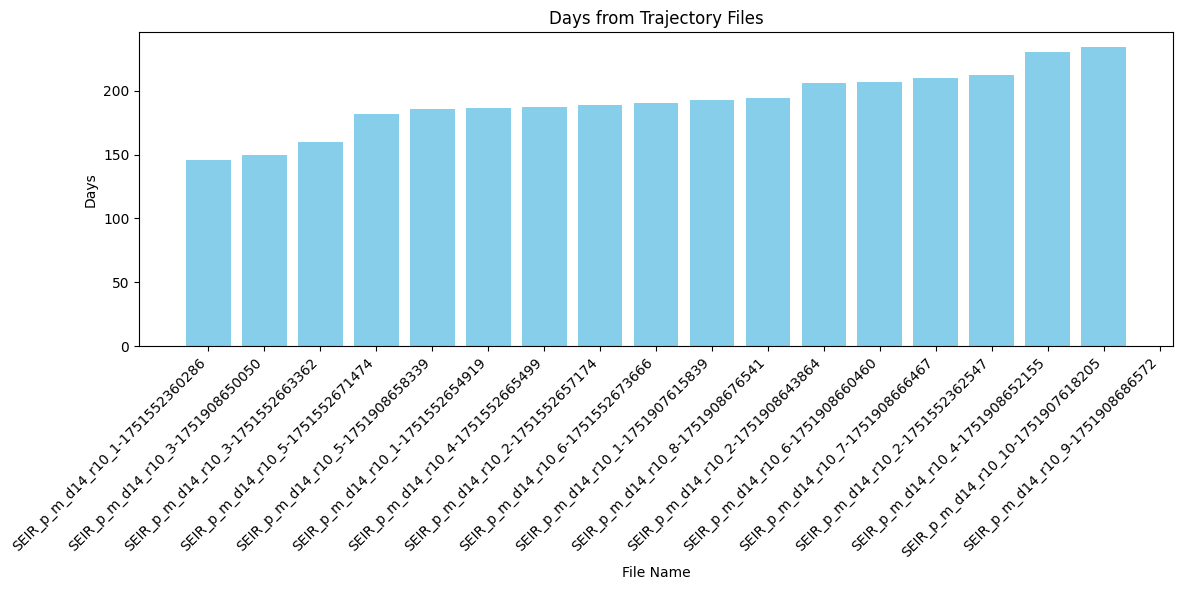

In [ ]:
with open('/Users/MiladM-Dev/Documents/1PhD/project-1-N450/git_trial/Scripts/xml_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Find all .traj files
traj_files = glob.glob(os.path.join(config["FilePath"]["outputFilePath"], "*.traj"))


results = []
for file in traj_files:
    df = pd.read_csv(file, sep='\t')
    results.append({
        "Days": df['t'].max(),
        "File": os.path.basename(file).replace('.traj', '')
    })
Time_df = pd.DataFrame(results).sort_values(by='Days', ascending=True)


plt.figure(figsize=(12, 6))
plt.bar(Time_df['File'], Time_df['Days'], color='skyblue')
plt.xlabel('File Name')
plt.ylabel('Days')
plt.title('Days from Trajectory Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot
plot_filename = config["FilePath"]["outputFilePath"]+"Bar_timeseries_plot.png"
plt.savefig(plot_filename, dpi=300)
plt.close()


# Save the DataFrame to a CSV file
#Time_df.to_csv(os.path.join(config["outputFilePath"], "time_df.csv"), index
plt.figure(figsize=(12, 6))
plt.hist(Time_df['Days'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Days from Trajectory Files')
plt.tight_layout()

plot_filename = config["FilePath"]["outputFilePath"]+"Hist_timeseries_plot.png"
plt.savefig(config["FilePath"]["outputFilePath"], plot_filename, dpi=300)
plt.close()


In [50]:
plt.figure(figsize=(12, 6))
plt.bar(Time_df['File'], Time_df['Days'], color='skyblue')
plt.xlabel('File Name')
plt.ylabel('Days')
plt.title('Days from Trajectory Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot
plot_filename = config["FilePath"]["outputFilePath"]+"Bar_timeseries_plot.png"
plt.savefig(plot_filename, dpi=300)
plt.close()